<a href="https://colab.research.google.com/github/AndreiMoraru123/Optimization/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

More than a classic ML algorithm, decision trees are widely used in day to day strategies such as chance event outcomes, cost reduction and general decision analysis. They represent conditional control statements, meaning you either get to pick which branch you want to go on, or the path chosen was caused by an event.

Consider the following somewhat linearly separable dataset:

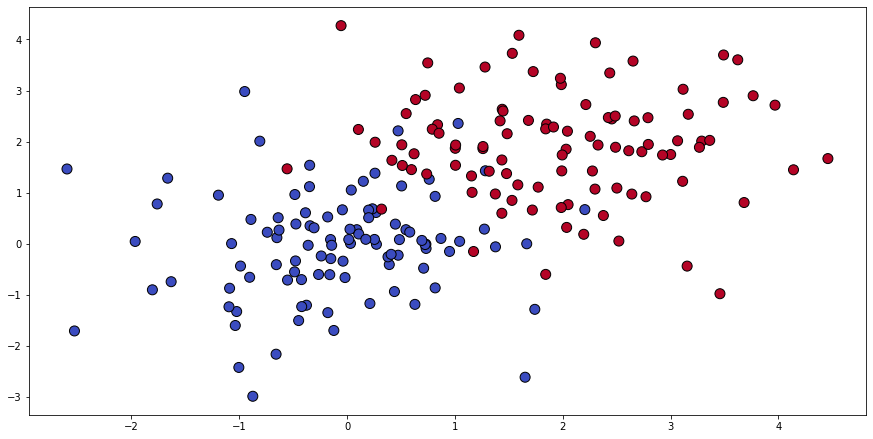

In [3]:
data = np.random.normal(size=(100, 2))
labels = np.zeros(100)

data = np.concatenate([data, np.random.normal(size=(100, 2), loc=2)])
labels = np.concatenate([labels, np.ones(100)])

plt.figure(figsize=(15, 7.5))
plt.scatter(data[:,0],data[:,1],c=labels, cmap = 'coolwarm', edgecolors = 'black', s= 100)
plt.show()

Decision trees are greedy algorithms that strive to minimize the **entropy** of the system.

Shannon defined entropy as:

${\displaystyle H=-{\sum _{i=1}^{n}p(x_i)\log2(p(x_i))}}$

which essentially represents the chaos of said system. In this context:

- x is the event

- p(x) is the probability of x

- the base 2 of the logarithm makes sense for a binary classification.

High entropy means great variability whereas low entropy means higher redundance. 

Unlike variance, entropy is agnostic to the distribution of the data, so it can be used as a measure for multiple types of data sets.

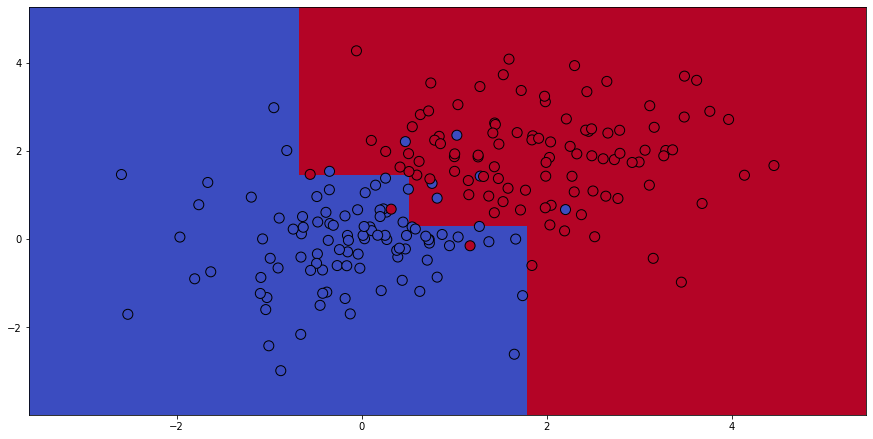

In [17]:
from sklearn.tree import DecisionTreeClassifier

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

clf_tree.fit(data, labels)

plt.figure(figsize = (15,7.5))
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="coolwarm")
plt.scatter(data[:, 0],data[:, 1], c=labels,s=100,cmap="coolwarm",edgecolors="black");

The algorithm works by separating groups of circles of both colors. The tree then "decides" what the next best possible separation is based on how much chaos it would cause. If all circles picked are blue, then there is no chaos, and the same goes for red.

The binary paths taken to find the least ammount of entropy (which eventually gets evaluated as 0) can be seen using the scikit-learn tree plot.

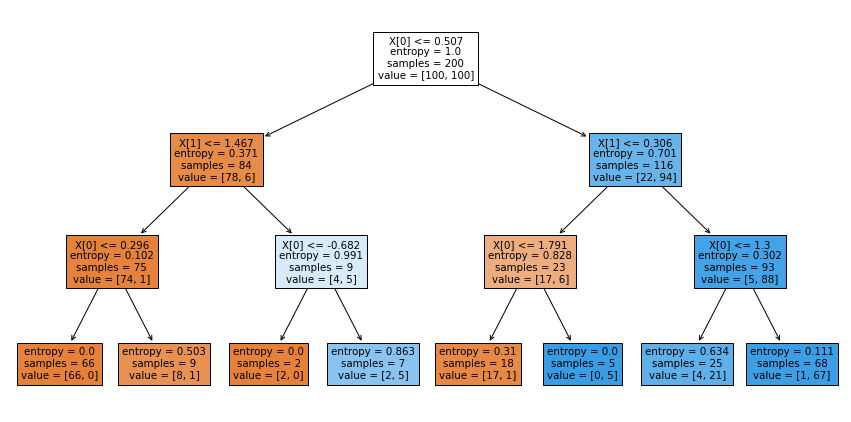

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7.5))

tree.plot_tree(clf_tree, filled=True)
plt.show()